# LINEAR REGRESSION MODEL

In [1]:
# importing liberaries

# for data manupulatiion
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for ignoring future warnings
import warnings
warnings.filterwarnings('ignore')
# parameters for graph
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
# for model
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Time%20Series/Linear%20model/footfalls.csv')
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [3]:
# Month column is independent feature
# Footfalls is target column

In [4]:
# descriptive statistics
df.describe()

,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1822.226415,80.000000,7.502746,8506.666667,0.088050,0.088050,0.088050,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761
std,181.601732,46.043458,0.101775,7605.556039,0.284263,0.284263,0.284263,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866
min,1361.000000,1.000000,7.215975,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1698.500000,40.500000,7.437500,1640.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1831.000000,80.000000,7.512618,6400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1967.000000,119.500000,7.584265,14280.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2223.000000,159.000000,7.706613,25281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# checking datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

In [6]:
# no missing values
# datatype is correct

<Axes: >

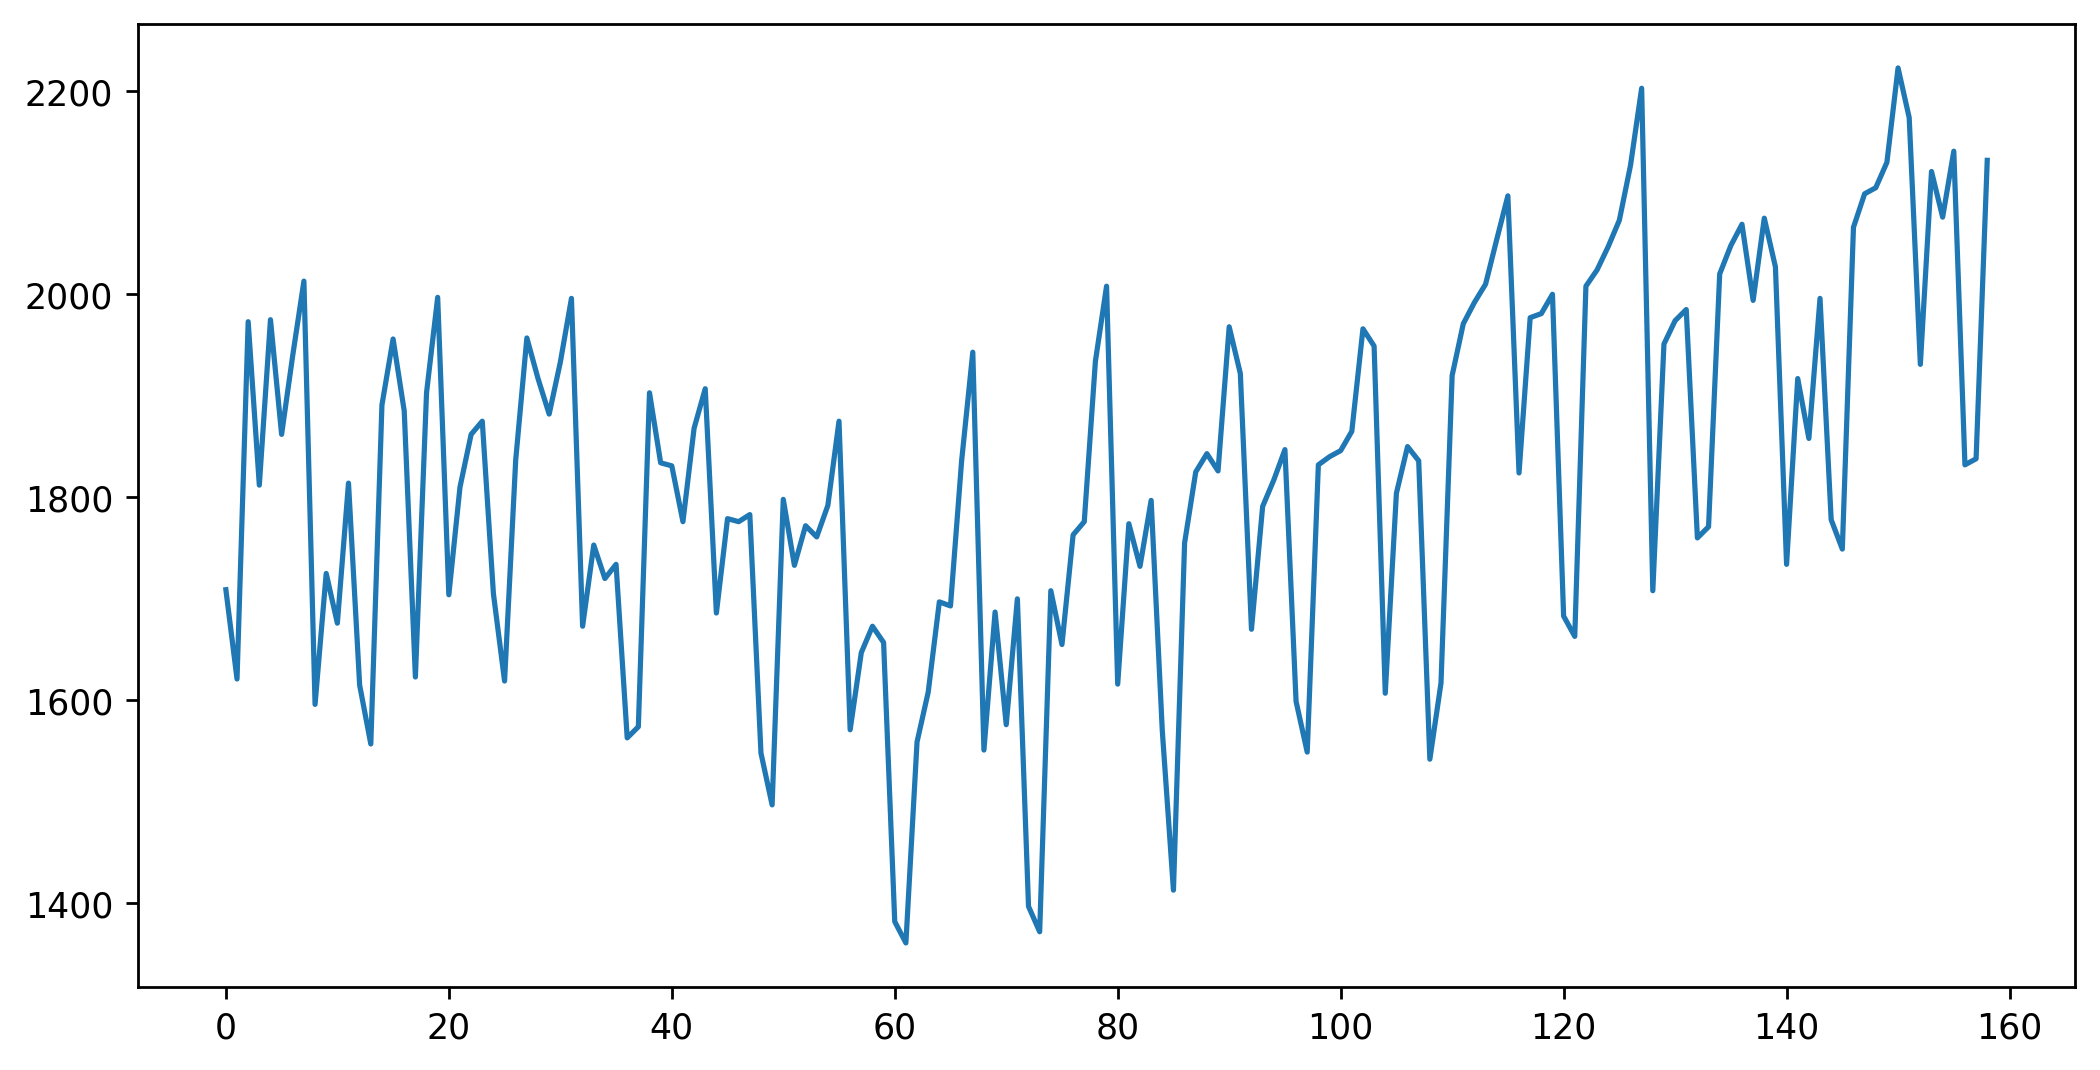

In [7]:
# plotting line plot
df['Footfalls'].plot()

In [8]:
# plotting line plot date
df.shape

(159, 17)

In [9]:
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
# because the date column is not present in proper format 
# so I will use this column this column to create new date column with proper format
df['Date'] = pd.to_datetime(df['Month'], format='%b-%y')

In [11]:
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [12]:
df['year'] = df['Date'].dt.strftime('%y')
df[['year']]

,year
0,91
1,91
2,91
3,91
4,91
...,...
154,03
155,03
156,04
157,04


In [13]:
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,03
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,03
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,04
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,04


<Axes: xlabel='year', ylabel='Footfalls'>

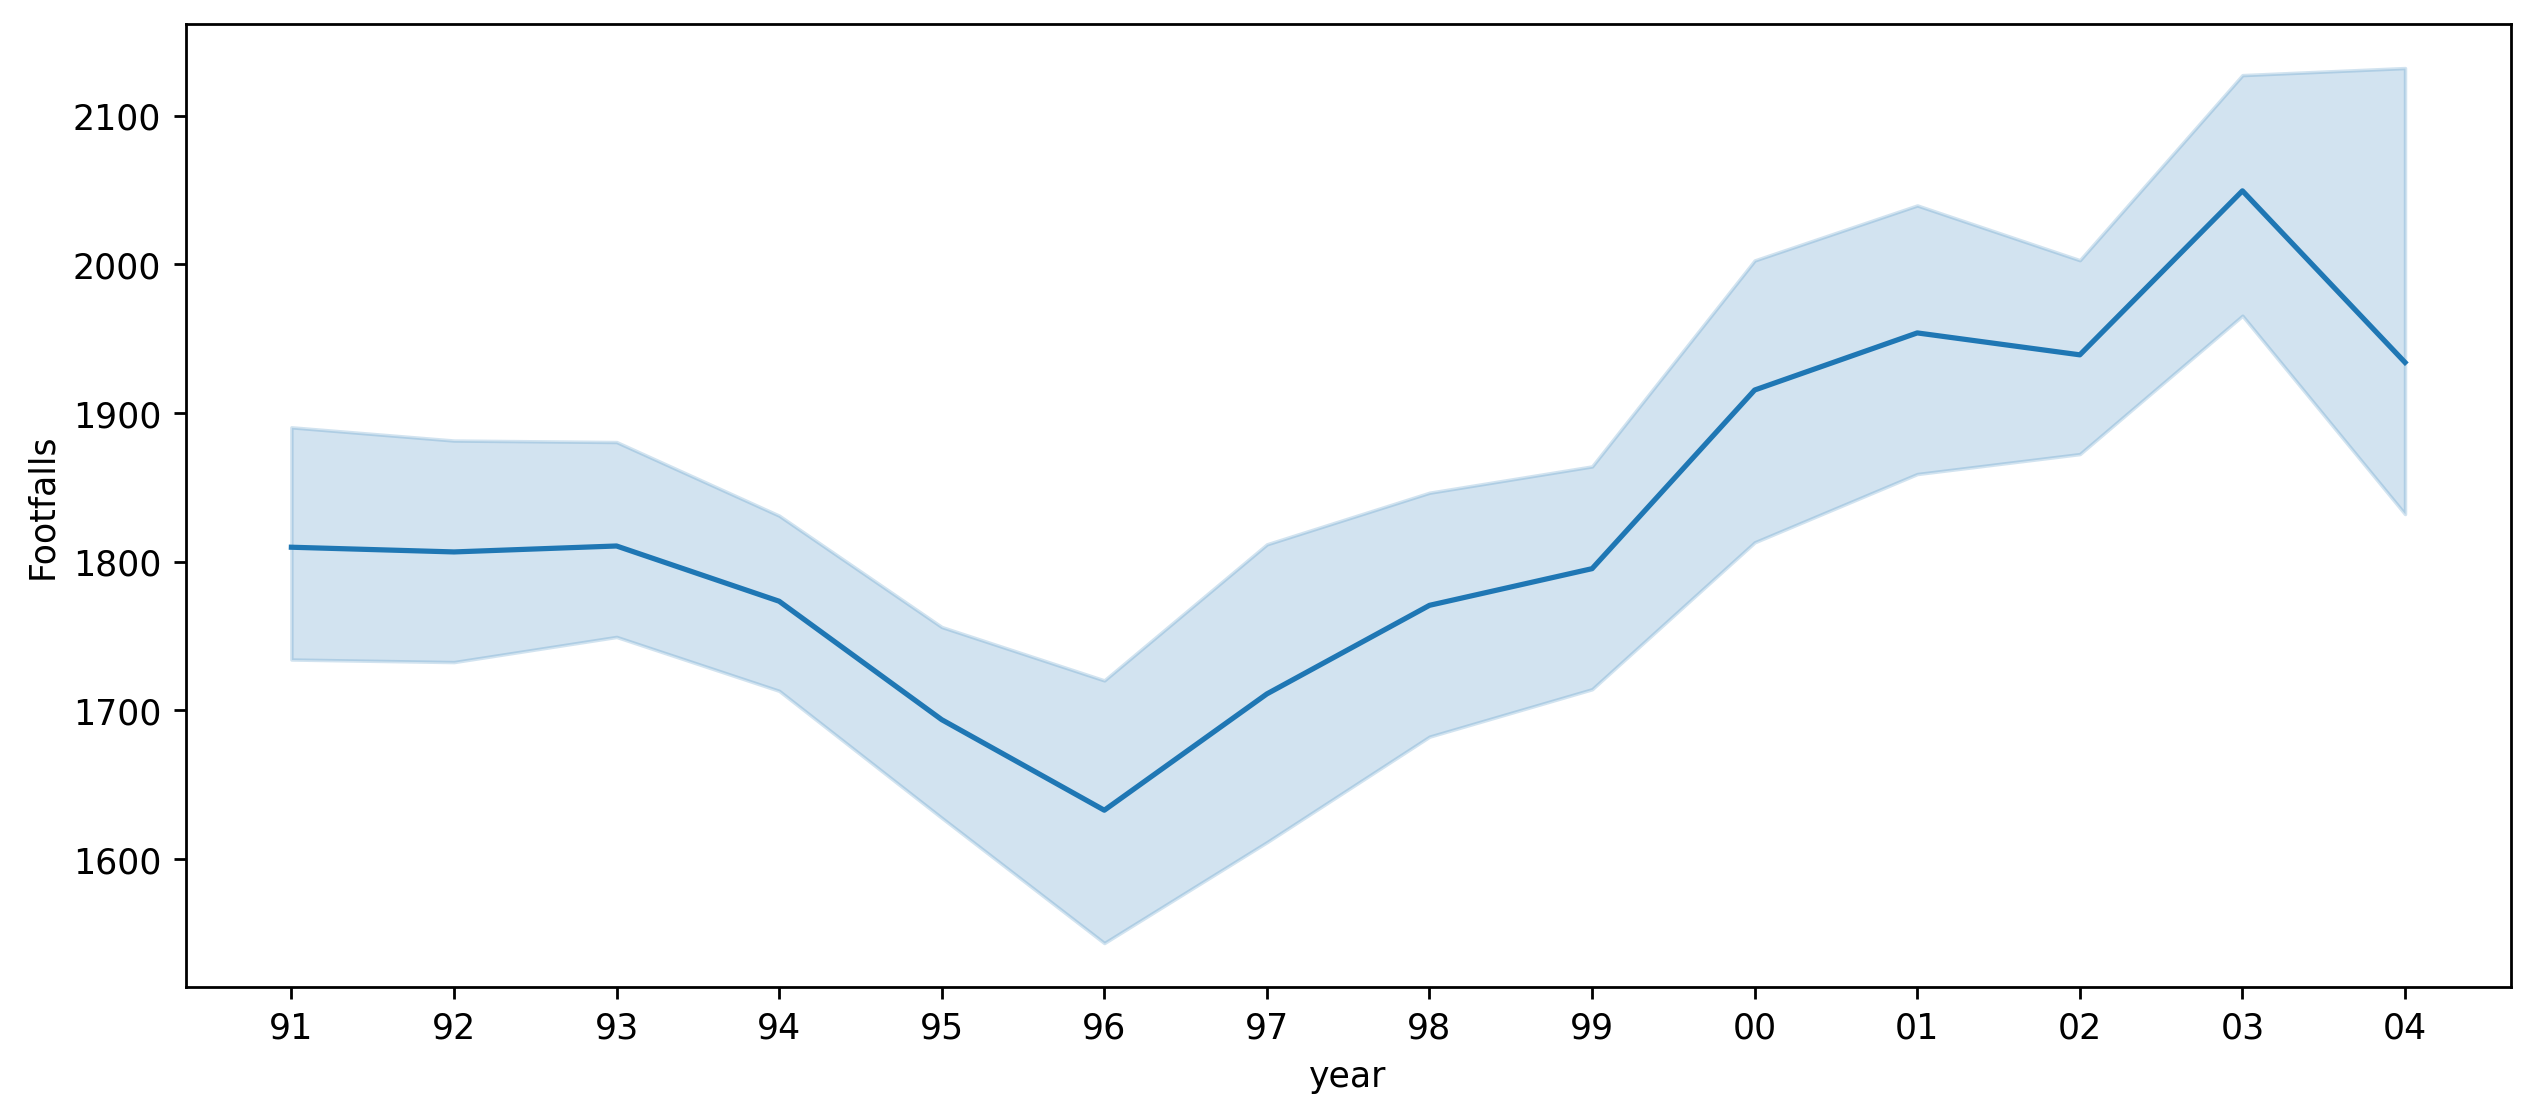

In [14]:
# line plot to see the year wise distribution of sales

plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='year', y='Footfalls')

# LINEAR MODEL

In [15]:
# splitting data
train = df.head(147)
test = df.head(12)

In [16]:
test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,91
5,Jun-91,1862,6,7.529406,36,0,0,0,0,0,1,0,0,0,0,0,0,1991-06-01,91
6,Jul-91,1940,7,7.570443,49,0,0,0,0,0,0,1,0,0,0,0,0,1991-07-01,91
7,Aug-91,2013,8,7.607381,64,0,0,0,0,0,0,0,1,0,0,0,0,1991-08-01,91
8,Sep-91,1596,9,7.375256,81,0,0,0,0,0,0,0,0,1,0,0,0,1991-09-01,91
9,Oct-91,1725,10,7.452982,100,0,0,0,0,0,0,0,0,0,1,0,0,1991-10-01,91


In [17]:
df.head(2)

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,91


In [18]:
# model building

linear_model = smf.ols('Footfalls~t', data=train).fit()
linear_pred = linear_model.predict(test[['t']])
linear_pred = pd.Series(linear_pred)
linear_pred

0     1714.320004
1     1715.524641
2     1716.729278
3     1717.933915
4     1719.138552
5     1720.343189
6     1721.547826
7     1722.752463
8     1723.957100
9     1725.161737
10    1726.366374
11    1727.571010
dtype: float64

In [19]:
# evaluation of model
from statsmodels.tools.eval_measures import rmse
rmse_linear = rmse(test['Footfalls'], linear_pred)
rmse_linear

165.16729586327136

# Exponential model

In [20]:
# here I need to use log(target_column) 
# so I have to pass log values of target column to build exponential model

In [21]:
df.head(2)

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,91


In [22]:
# creating model
exp_model = smf.ols('log_footfalls~t', data=train).fit()
# model training
exp_pred = exp_model.predict(test['t'])
# evaluation of model
exp_rmse = rmse(test['Footfalls'], exp_pred)
exp_rmse

1807.5632583045942

In [23]:
# It is higher than the linear model's rmse

# QUADRATIC MODEL

In [24]:
df.head(2)

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,91


In [25]:
# creating model
quad_model = smf.ols('Footfalls~t+t_square', data=train).fit()
# model training
quad_pred = quad_model.predict(test[['t', 't_square']])
# evaluation of model
quad_rmse = rmse(test['Footfalls'], quad_pred)
quad_rmse

140.26593295291903

# ADDITIVE SEASONALITY MODEL

In [36]:
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,91


In [43]:
import statsmodels.formula.api as smf

# Fit the model using the training data
add_model = smf.ols('Footfalls ~ t + t_square + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data=train).fit()

# Predict using the test data
pred_add = add_model.predict(test[[ 't', 't_square', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']])

rmse_add = rmse(test['Footfalls'] , pred_add)
rmse_add

69.90641285263347

In [ ]:
# till now this model's rmse value is the lowest

# MULTIPLICATIVE SEASONALITY

In [44]:
df.head(3)

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,91


In [50]:
# model training
mul_model = smf.ols('log_footfalls ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data=train).fit()
# getting prediction
pred_mul = mul_model.predict(test[[ 't', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']])
# evlauation
rmse_mul = rmse(test['Footfalls'], pred_mul)
rmse_mul

1807.5578562294793

In [ ]:
# it is huge number 
# I can see that quadratic model is giving me the best result because I know that there is a quadratic trend present in the dataset
# so I need to first find out the trend in the dataset and then according to that proceed further